INN HOTEL(PORTUGAL)

THE DATA CONTAINS INFORMATION ABOUT A HOTEL INN HOTELS GROUP WHICH HAS A CHAIN OF HOTELS IN PORTUGAL.

AIM:The main aim of this analysis would be to find out the reason for hotel booking cancellations.


The data contains the different attributes of customers' booking details.

DATA DETAILS:

Booking_ID: unique identifier of each booking

no_of_adults: Number of adults

no_of_children: Number of Children

no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

type_of_meal_plan: Type of meal plan booked by the customer:
Not Selected – No meal plan selected

Meal Plan 1 – Breakfast

Meal Plan 2 – Half board (breakfast and one other meal)

Meal Plan 3 – Full board (breakfast, lunch, and dinner)

required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)

room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.

lead_time: Number of days between the date of booking and the arrival date
arrival_year: Year of arrival date

arrival_month: Month of arrival date

arrival_date: Date of the month

market_segment_type: Market segment designation.

repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)

no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking

no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking

avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)

no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

booking_status: Flag indicating if the booking was canceled or not.

IMPORTING DIFFERENT LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
df=pd.read_csv("/content/INN hotel.zip")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
df.shape

(36275, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

NO NULL VALUES FOUND IN THE DATA.


In [6]:
duplicates = df[df.duplicated()]
duplicates.shape




(0, 19)

In [7]:
df.duplicated().sum()

0

THE PROVIDED DATA CONTAINS NO DUPLICATE VALUES

In [8]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [9]:
df.drop('Booking_ID',axis=1,inplace=True)

BOOKING ID IS DROPPED AS IT HOLDS NO ANALYTICAL SIGNIFICANCE.

DESCRIPTIVE STATISTICS

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


WITH THE ABOVE DESCRIPTIVE STATISTICS PERFORMED

1. Maximum number of bookings recorded on week nights is 17 compared to weekend nights 7.


*   The lead_time (time between arrival and booking the room) maximum recorded is 443 days.


2. Average price per room minimum is at 0 euros, and maximum of 540 euros

 Compared to all,AVERAGE PRICE PER ROOM AND NUMBER OF DAYS BEFORE BOOKING THE ROOM AND ARRIVAL TIME (LEAD TIME) HAS STANDARD DEVIATION HIGHER AND DENOTES POSSIBLE OUTLIERS

CHECKING FOR OUTLIERS USING BOXPLOT

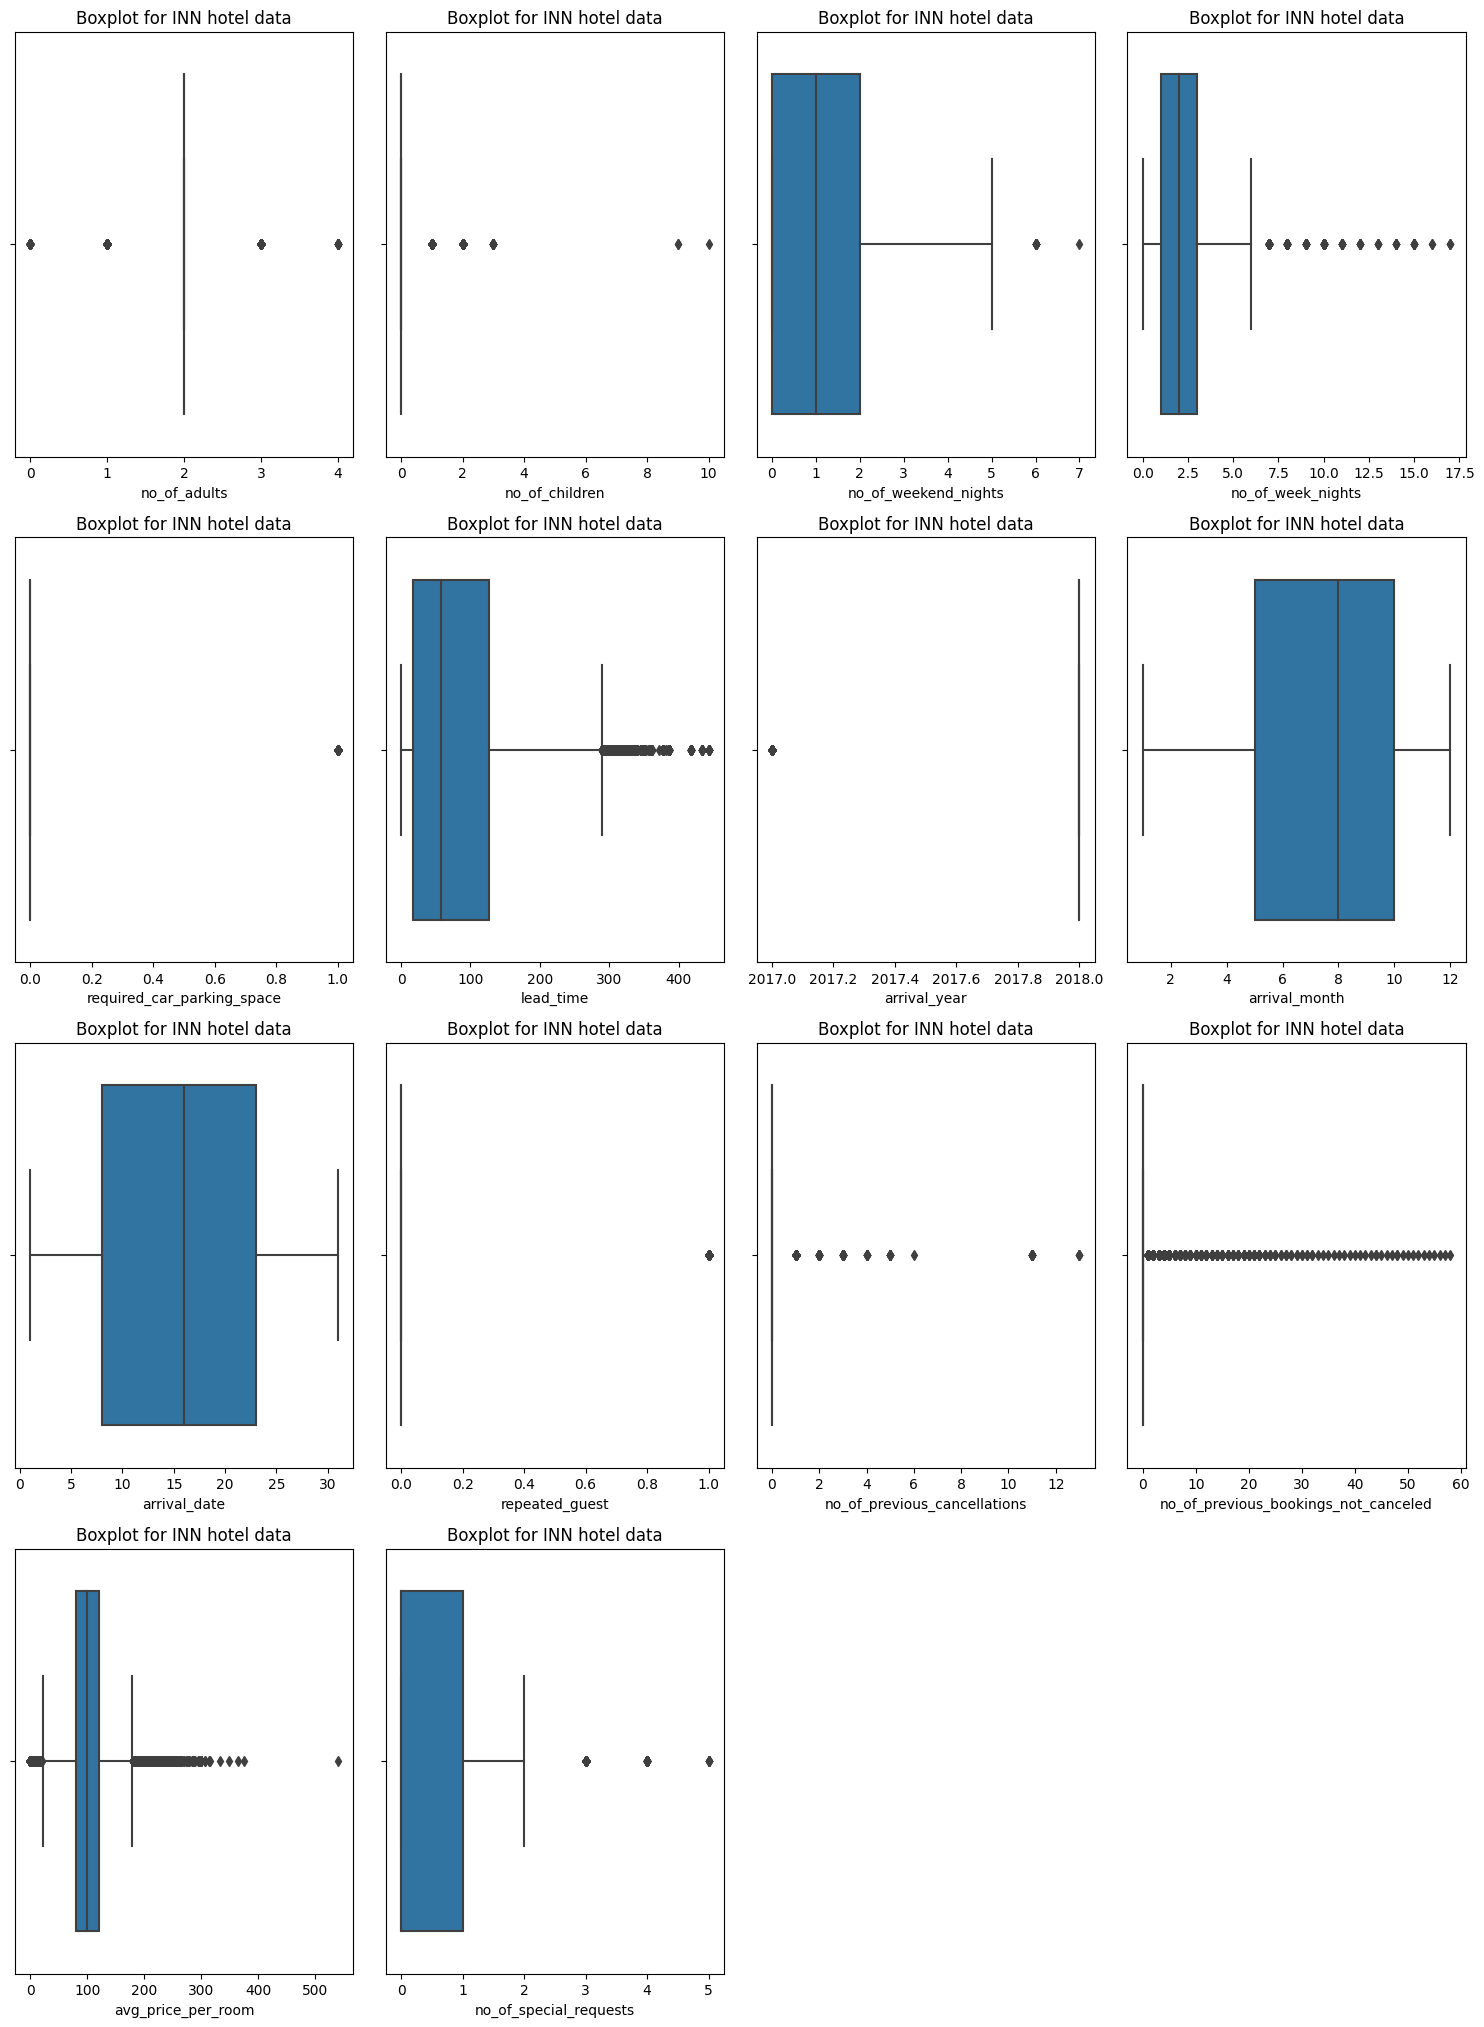

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

# Plot boxplots for numeric columns
plt.figure(figsize=(15, 25))

for i, variable in enumerate(numeric_columns, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(x=df[variable])
    plt.title('Boxplot for INN hotel data')
plt.tight_layout()
plt.show()


OUTLIERS FOUND IN LEAD_TIME AND AVG_PRICE_PER_ROOM

# EXPLORATORY DATA ANALYSIS

THE APPROACH CAN BE NUMBER OF PREVIOUS CANCELLATION BY CUSTOMER TO BOOKING_STATUS;
AVG_PRICE_ROOM ON WEEKEND_NIGHTS AND WEEK NIGHTS TO BOOKING_STATUS. ROOM_TYPE_RESERVED TO BOOOKING STATUS.

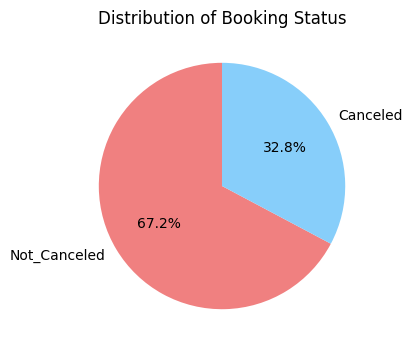

In [12]:
import matplotlib.pyplot as plt


booking_status_counts = df['booking_status'].value_counts()

# Pie chart
plt.figure(figsize=(8, 4))
plt.pie(booking_status_counts, labels=booking_status_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Distribution of Booking Status')
plt.show()


The distribution of data fromm above graph represents the ratio of bookings canceled to not canceled is leaned towards 67.2% for bookings which are not canceled compared to canceled so their is possible biased model training.

STACKED GRAPH REPRESENTING BOOKING ON WEEK AND WEEKEND.

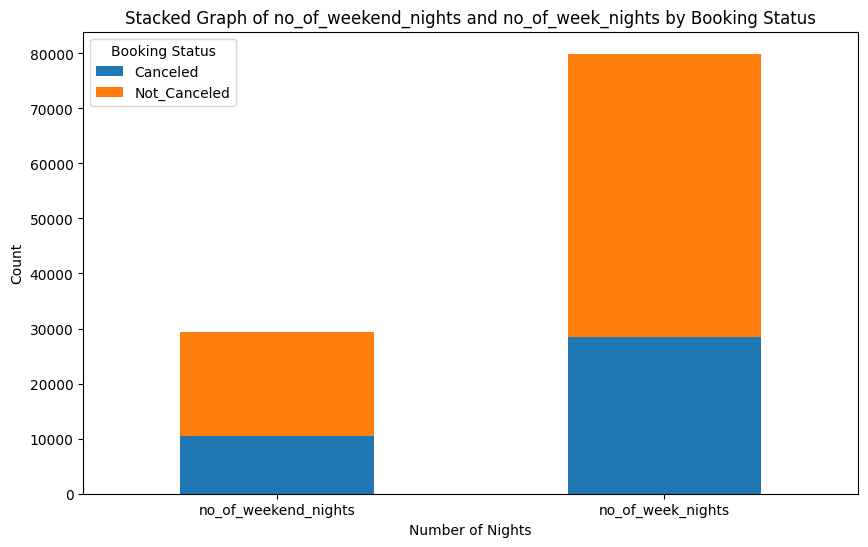

In [13]:
DATA=df[['no_of_weekend_nights','no_of_week_nights','booking_status']]
df1=pd.DataFrame(DATA)
grouped_data=df1.groupby(['booking_status'])[['no_of_weekend_nights','no_of_week_nights']].sum()
stacked_data=grouped_data.T

ax=stacked_data.plot(kind='bar',stacked=True,figsize=(10,6))
plt.title('Stacked Graph of no_of_weekend_nights and no_of_week_nights by Booking Status')
plt.xlabel('Number of Nights')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Booking Status')

plt.show()

The graph represents INN hotel has more bookings on week nights compared to weekends and the percentage of cancellation is approximately 35% for week nights and 36% for weekend nights.



# BAR-CHART REPRESENTING DISTRIBUTION OF ROOM_TYPE_RESERVED

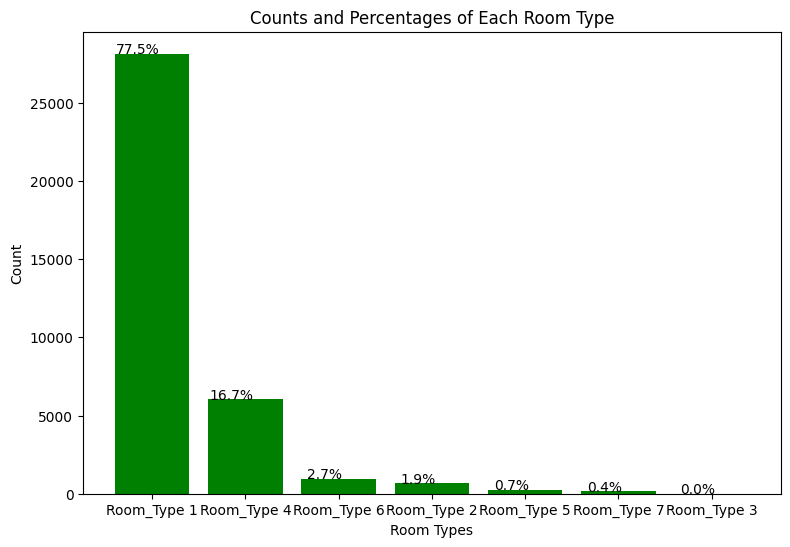

In [14]:
import matplotlib.pyplot as plt


room_type_counts = df['room_type_reserved'].value_counts()

# Calculate percentages
total_count = len(df['room_type_reserved'])
percentage_values = (room_type_counts / total_count) * 100

# Bar chart with percentages
plt.figure(figsize=(9, 6))
bars = plt.bar(room_type_counts.index, room_type_counts, color='green')
for bar, percentage in zip(bars, percentage_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.1, f'{percentage:.1f}%', ha='center')

plt.xlabel('Room Types')
plt.ylabel('Count')
plt.title('Counts and Percentages of Each Room Type')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()


According to the bar plot , room type 1 and room type 4 are leading rooms to be reserved by customers.

STACKED GRAPH REPRESENTING BOOKING WITH RESPECT TO SPECIAL REQUESTS(Car space,view from room).

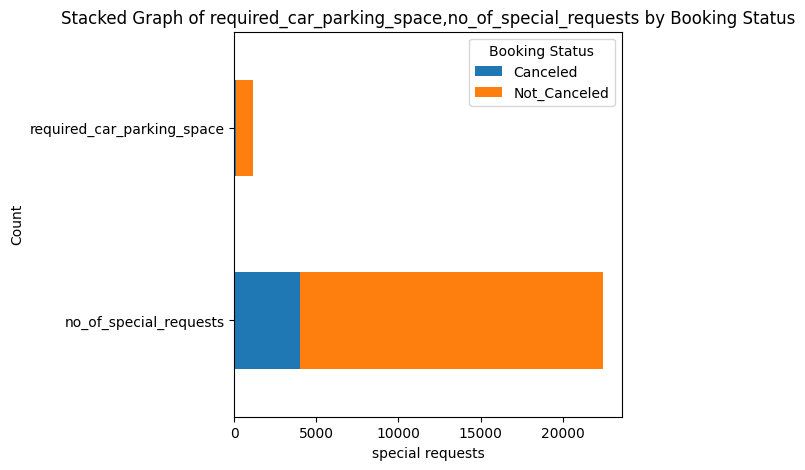

In [15]:
DATA1=df[['required_car_parking_space','no_of_special_requests','booking_status']]
df2=pd.DataFrame(DATA1)
grouped_data1=df2.groupby(['booking_status'])[['no_of_special_requests','required_car_parking_space']].sum()
stacked_data=grouped_data1.T

ax=stacked_data.plot(kind='barh',stacked=True,figsize=(5,5))
plt.title('Stacked Graph of required_car_parking_space,no_of_special_requests by Booking Status')
plt.xlabel('special requests')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Booking Status')

plt.show()



* Number of special requests made by guests are comparitively high like the view from room.


*   People who cancelled on basis of no_of_Special requests like view of room,room available on certain floor are higher.

* According to the data,people who cancelled on available car parking space is lot less ,so people dont cancel on basis of car parking space.



CANCELLATION BASED ON AVAILABLE ROOM TYPE(PRIOR RESERVATIONS)

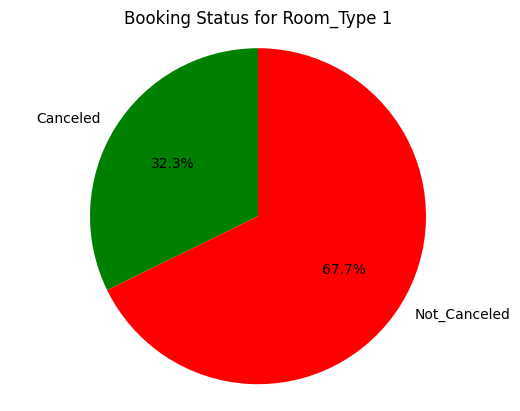

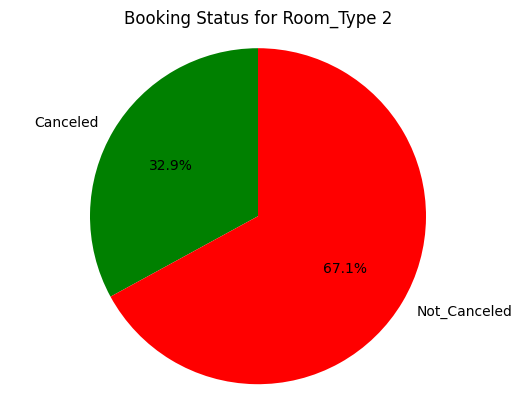

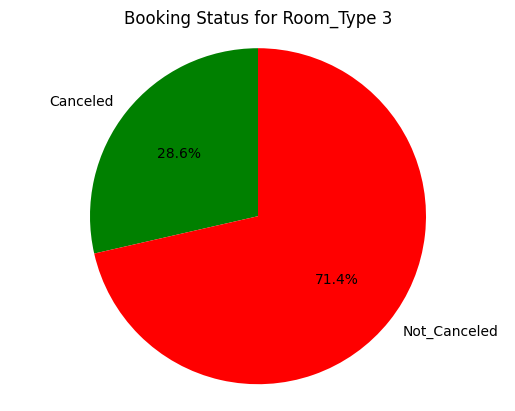

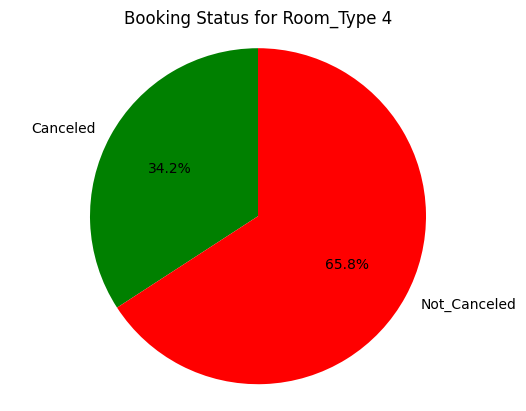

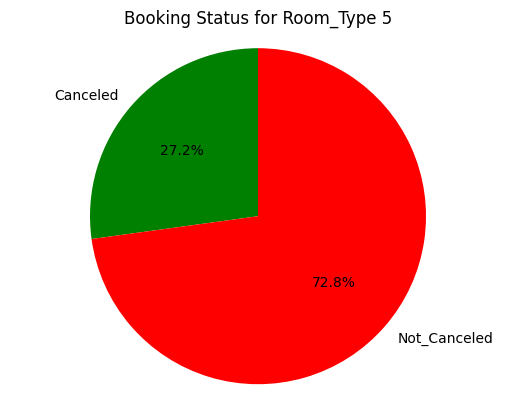

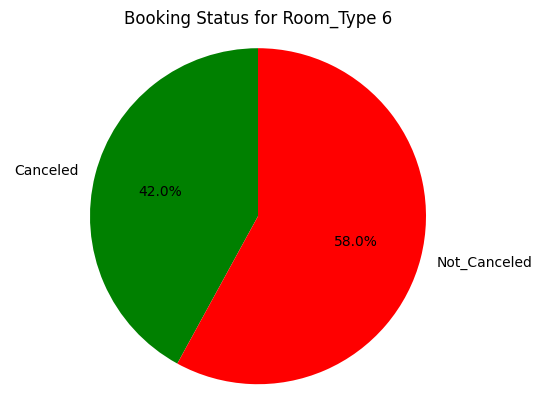

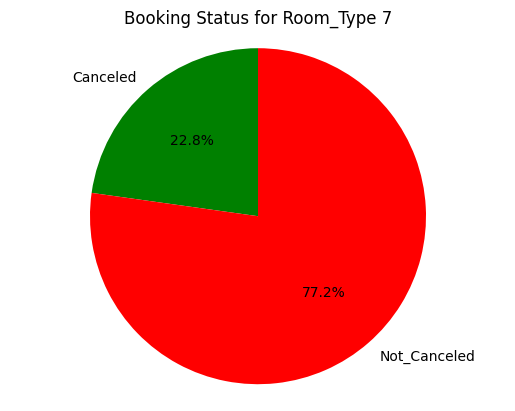

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
room_type = df[['room_type_reserved','booking_status']]
RT = pd.DataFrame(room_type)
grouped_data = RT.groupby(['room_type_reserved', 'booking_status']).size().unstack().fillna(0)
for room_type in grouped_data.index:
    room_data = grouped_data.loc[room_type]
    plt.figure()
    plt.pie(room_data, labels=room_data.index, autopct='%1.1f%%', startangle=90,colors='green')
    plt.title(f'Booking Status for {room_type}')
    plt.axis('equal')

plt.show()


CANCELLATION RATE OF DIFFERENT ROOM TYPES

Room_type 1 =32.3%

Room_type 2=32.9%

Room_type 3=28.6%

Room_type 4=34.2%

Room_type 5=27.2%

Room_type 6=42.0%

Room_type 7=22.8%

The cancellation of room type 6 is higher ,lowest for room type 7

In [17]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

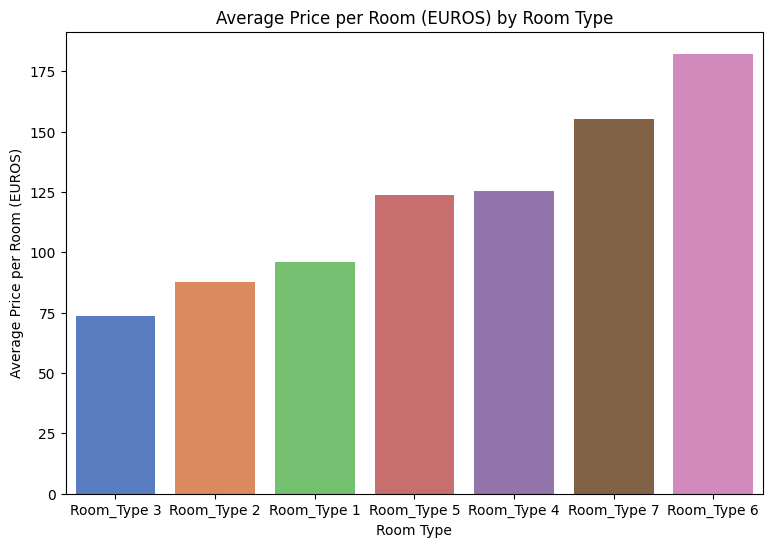

In [18]:
room_type_data = df[['room_type_reserved', 'avg_price_per_room', 'booking_status']]
data_room = pd.DataFrame(room_type_data)
plt.figure(figsize=(9, 6))
#The average price per room for each room type
avg_price_by_room_type = data_room.groupby('room_type_reserved')['avg_price_per_room'].mean().sort_values()
# A bar plot
sns.barplot(x=avg_price_by_room_type.index, y=avg_price_by_room_type.values, palette='muted')
plt.title('Average Price per Room (EUROS) by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price per Room (EUROS)')
plt.show()


Average price per room is highest for room type 6,7.


PIE CHART FOR MEAL PLANS

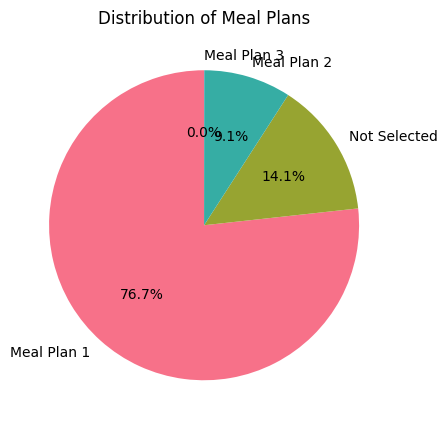

In [19]:
plt.figure(figsize=(5, 6))
meal_plan_counts = df['type_of_meal_plan'].value_counts()
colors = sns.color_palette('husl', n_colors=len(meal_plan_counts))
plt.pie(meal_plan_counts, labels=meal_plan_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Meal Plans')
plt.show()


type_of_meal_plan: Type of meal plan booked by the customer: Not Selected – No meal plan selected

Meal Plan 1 – Breakfast

Meal Plan 2 – Half board (breakfast and one other meal)

Meal Plan 3 – Full board (breakfast, lunch, and dinner)


*   MOST OF CUSTOMERS CHOOSE THE MEAL PLAN 1 (BREAKFAST)
*   CUSTOMERS WHO DIDN'T SELECT ANYTHING IS MORE THAN WHO OPT FOR MEAL 2 WHICH INCLUDES(BREAKFAST AND ONE MEAL)



BASED ON REPEATED GUEST

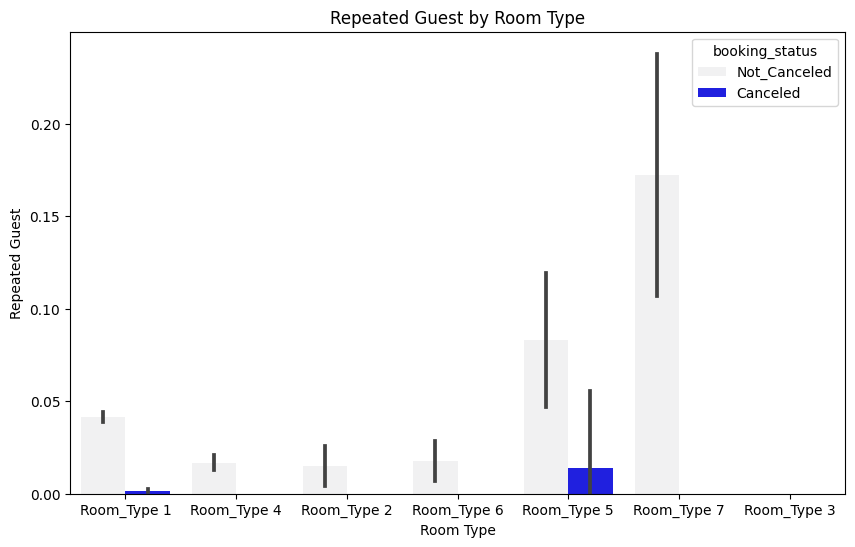

In [20]:
room_type_data = df[['room_type_reserved', 'repeated_guest', 'booking_status']]
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type_reserved', y='repeated_guest', hue='booking_status', data=room_type_data, color='blue')
plt.xlabel('Room Type')
plt.ylabel('Repeated Guest')
plt.title('Repeated Guest by Room Type')
plt.show()




*   The repeated guest who booked on room_type 5 cancelled the most



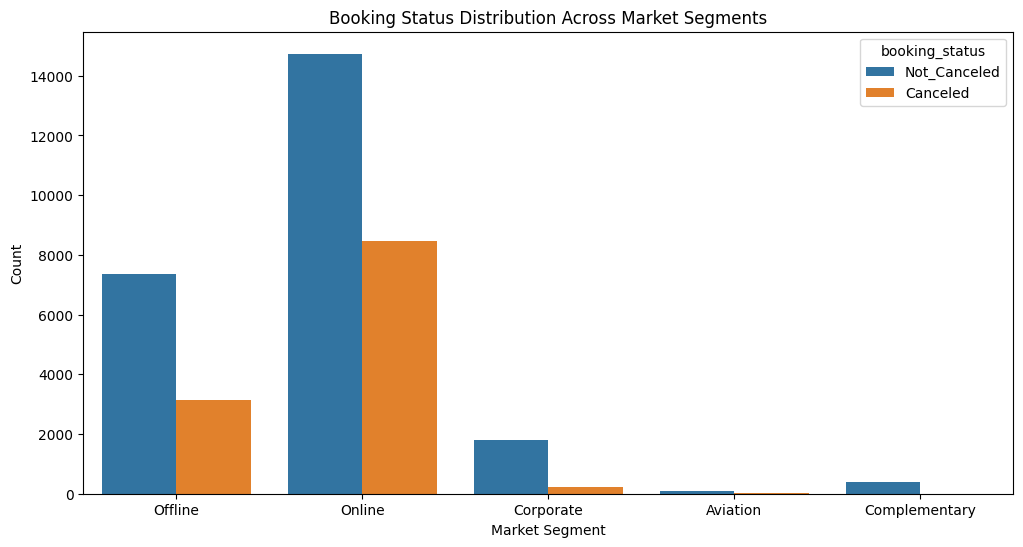

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.countplot(x='market_segment_type', hue='booking_status', data=df)
plt.title('Booking Status Distribution Across Market Segments')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.show()


THE NUMBER OF PEOPLE WHO CANCELLED THE BOOKED ROOM ARE MOSTLY WHO OPTED FOR ONLINE BOOKING

BAR PLOT REPRESENTING BOOKING STATUS BASED ON NUMBER OF ADULTS.

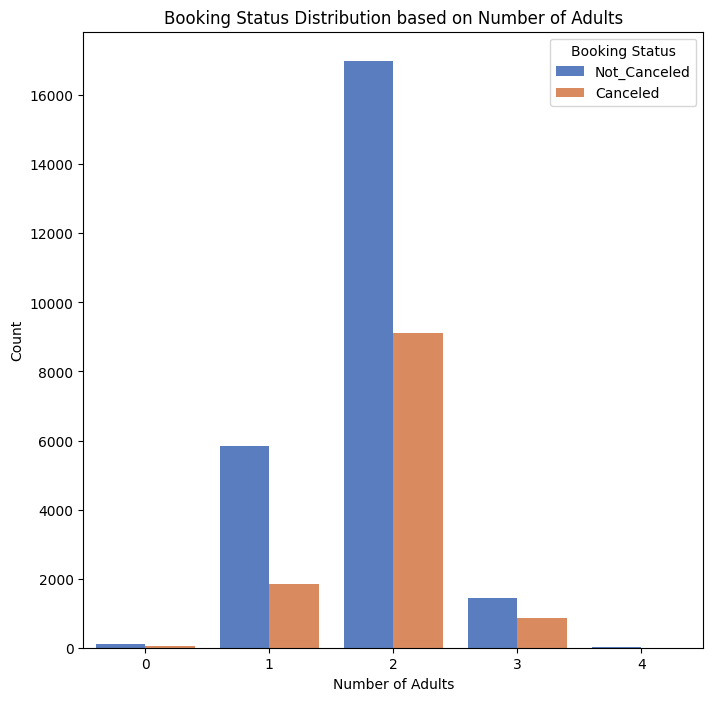

In [22]:
plt.figure(figsize=(8, 8))
sns.countplot(x='no_of_adults', hue='booking_status', data=df, palette='muted')
plt.title('Booking Status Distribution based on Number of Adults')
plt.xlabel('Number of Adults')
plt.ylabel('Count')
plt.legend(title='Booking Status')
plt.show()


1.According to the plot
people who booked the room in hotel with 2 in number and    
1 in number are more(hotel may be famous for couples and single visitors) and,the cancellation ratio significantly high for a 2 in number booking compared to 1 in number.

2. People who came as 3 in number are relatively less and half-of bookings resulted in cancellation.






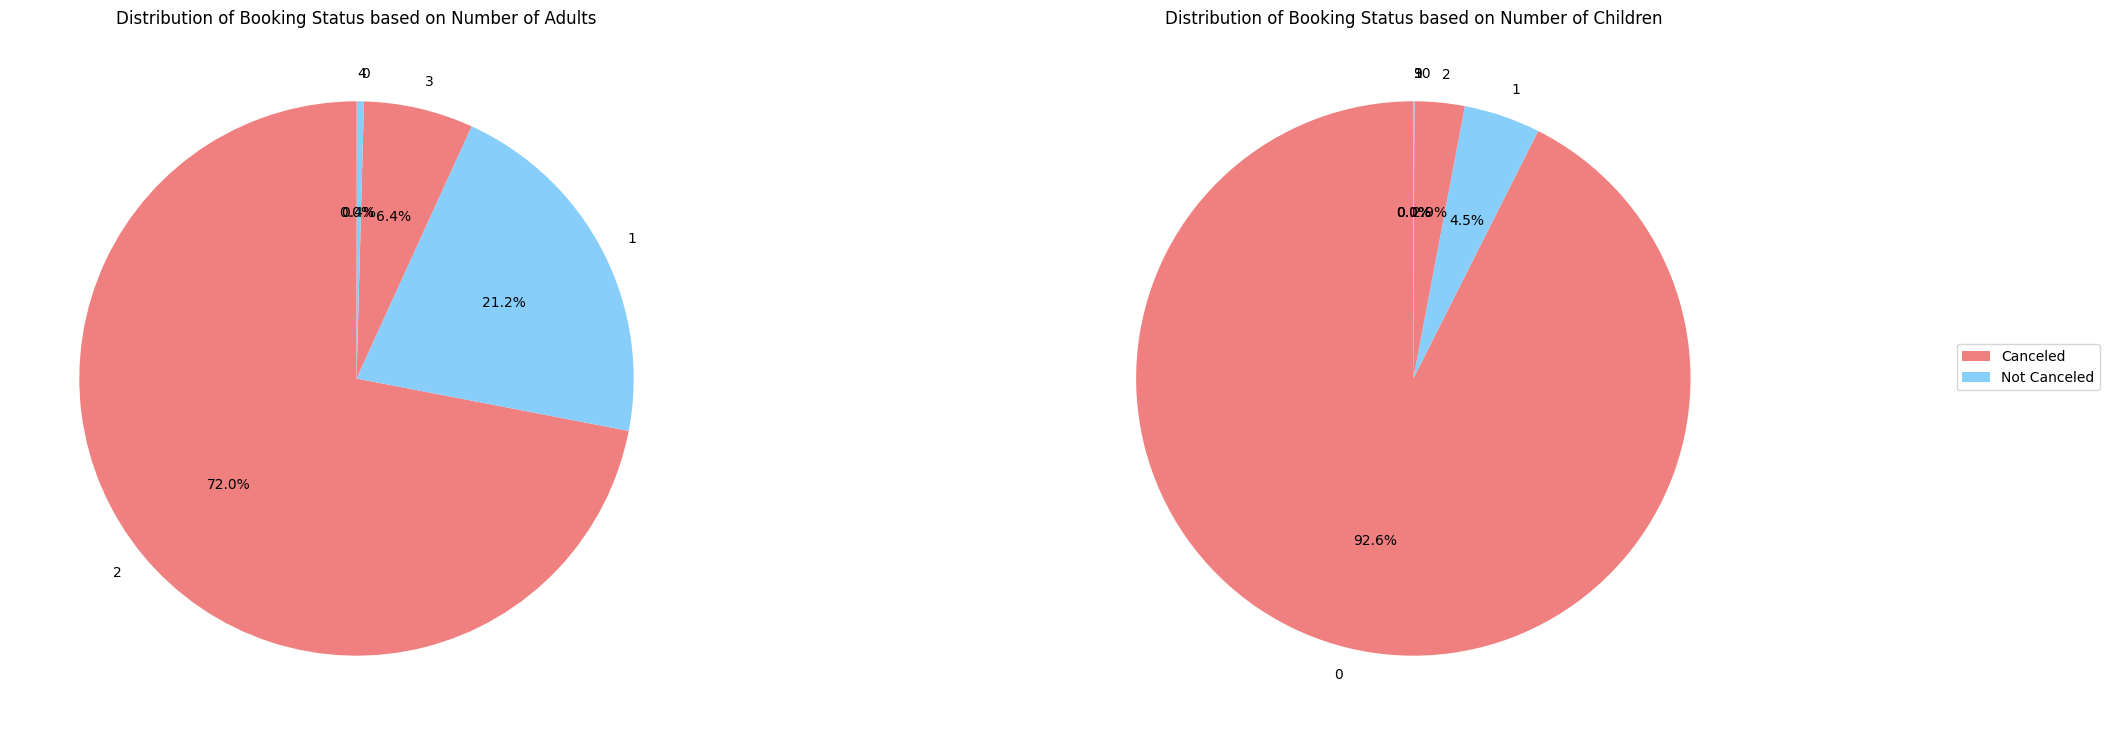

In [23]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(25, 9))

# Pie plot for 'no_of_adults'
adults_counts = df['no_of_adults'].value_counts()
axes[0].pie(adults_counts, labels=adults_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
axes[0].set_title('Distribution of Booking Status based on Number of Adults')

# Pie plot for 'no_of_children'
children_counts = df['no_of_children'].value_counts()
axes[1].pie(children_counts, labels=children_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
axes[1].set_title('Distribution of Booking Status based on Number of Children')
fig.legend(['Canceled', 'Not Canceled'], loc='center right')
plt.show()


According to the pie plot the number of people who reserved room with children(92.6%) cancelled more than who reserved room as adults(72%).
People with children give less preference to stay in this hotel.

REMOVING OUTLIERS

REMOVING OUTLIERS FROM THE LEAD TIME COLUMN .

In [24]:
Q1 = df['lead_time'].quantile(0.25)
Q3 = df['lead_time'].quantile(0.75)

IQR = Q3 - Q1
lower_whisker = Q1-1.5*IQR
upper_whisker = Q3+1.5*IQR

print(f"Q1 = {Q1}")
print(f"Q3 = {Q3}")
print(f"IQR = {IQR}")
print(f"Lower Whisker = {lower_whisker}")
print(f"Upper Whisker = {upper_whisker}")

Q1 = 17.0
Q3 = 126.0
IQR = 109.0
Lower Whisker = -146.5
Upper Whisker = 289.5


In [25]:
new_df=df[ df['lead_time']<upper_whisker ]
new_df.head(3)
df['lead_time']=new_df['lead_time']

<ipython-input-26-d101abd1b111>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


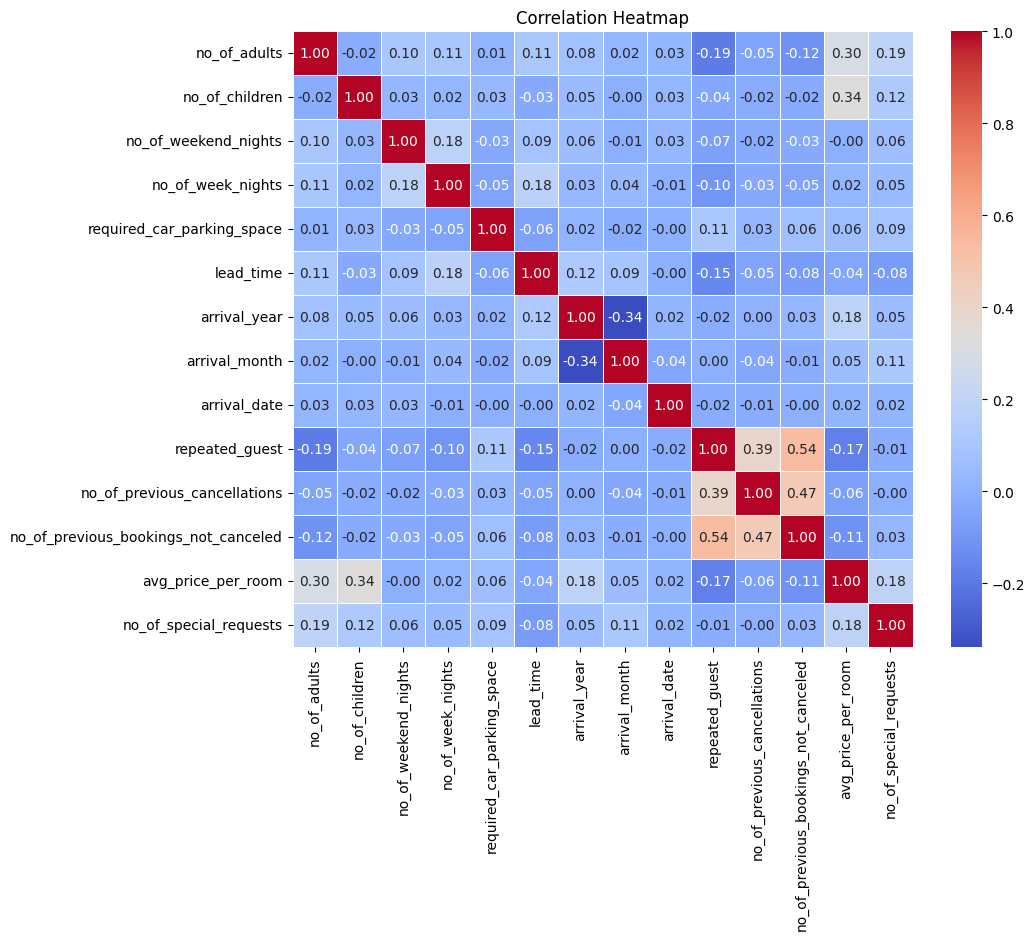

In [26]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


MACHINE LEARNING MODEL

In [27]:
x = df.iloc[:,0:-1]
y=df['booking_status']

SAMPLING

In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
def equal_class_split(x, y):
    unique_labels = np.unique(y_test)
    train_indices, test_indices = [], []

    for label in unique_labels:
        label_indices = np.where(y == y)[0]
        split_point = int(len(label_indices) * 0.8)  # 80-20 split

        train_indices.extend(label_indices[:split_point])
        test_indices.extend(label_indices[split_point:])

    return np.array(train_indices), np.array(test_indices)



SAMPLING TECHNIQUE OF EQUAL SPLIT OF TRAIN TEST CLASSES ARE USED AS THE DATA IS BIASED SO AS TO GIVE EQUAL IMPORTANCE TO EACH CLASSIFICATION.

In [30]:
x_obj_col = x.select_dtypes(include='O').columns
x_obj_col

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], dtype='object')

In [31]:
# Feature engineering
# handle cantegorical features
from sklearn.preprocessing import LabelEncoder

x[x_obj_col] = x[x_obj_col].apply(LabelEncoder().fit_transform)
x.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,0,0,224.0,2017,10,2,3,0,0,0,65.00,0
1,2,0,2,3,3,0,0,5.0,2018,11,6,4,0,0,0,106.68,1
2,1,0,2,1,0,0,0,1.0,2018,2,28,4,0,0,0,60.00,0
3,2,0,0,2,0,0,0,211.0,2018,5,20,4,0,0,0,100.00,0
4,2,0,1,1,3,0,0,48.0,2018,4,11,4,0,0,0,94.50,0


In [32]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
x = imputer.fit_transform(x)

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

df['booking_status_encoded'] = label_encoder.fit_transform(df['booking_status'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)


Label Mapping: {'Canceled': 0, 'Not_Canceled': 1}


In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [36]:
# feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

models = [LogisticRegression(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()]

In [39]:
for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model} :- \t Accuracy = {accuracy:.2f}")

LogisticRegression() :- 	 Accuracy = 0.78
GaussianNB() :- 	 Accuracy = 0.44
DecisionTreeClassifier() :- 	 Accuracy = 0.87
RandomForestClassifier() :- 	 Accuracy = 0.90
KNeighborsClassifier() :- 	 Accuracy = 0.85


In [40]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Canceled       0.79      0.75      0.77      3026
Not_Canceled       0.88      0.90      0.89      6043

    accuracy                           0.85      9069
   macro avg       0.83      0.82      0.83      9069
weighted avg       0.85      0.85      0.85      9069



In [44]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2482,  544],
       [ 325, 5718]])

In [42]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

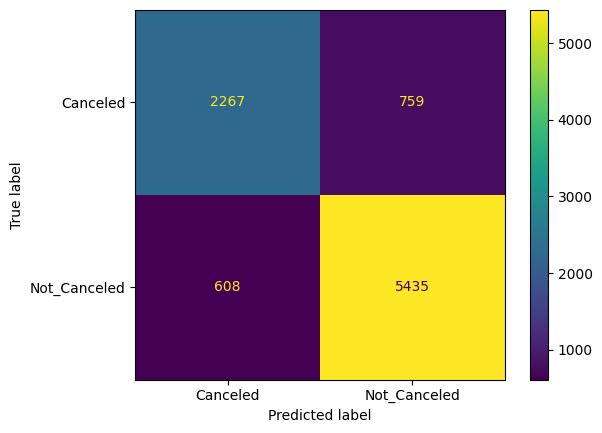

In [43]:
ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot()

In [ ]:
#RANDOM FOREST MODEL  GIVES THE BEST ACCURACY OF 90%



1.  People who cancel most are from online booking ,with children,who are repeated guests mostly booking room type 5.
2. In the hotel ,most rooms are reserved by couples.
3.Random forest classifier gives the best accuracy score indicating a potential model for predicting the chances of customer cancelling or not cancelling the booking.



